# Лабораторна робота №6
## Завдання 2

- Завантажити датасет про житло у Каліфорнії.
- Визначити оптимальну кількість кластерів методом ліктя та силуетів.
- Візуалізувати кластери.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


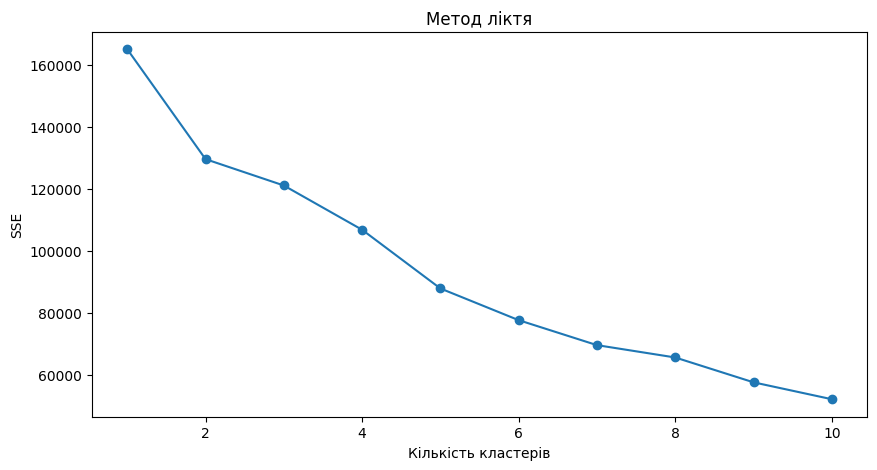

In [13]:
X_scaled = StandardScaler().fit_transform(X)

# Метод ліктя
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.title('Метод ліктя')
plt.show()

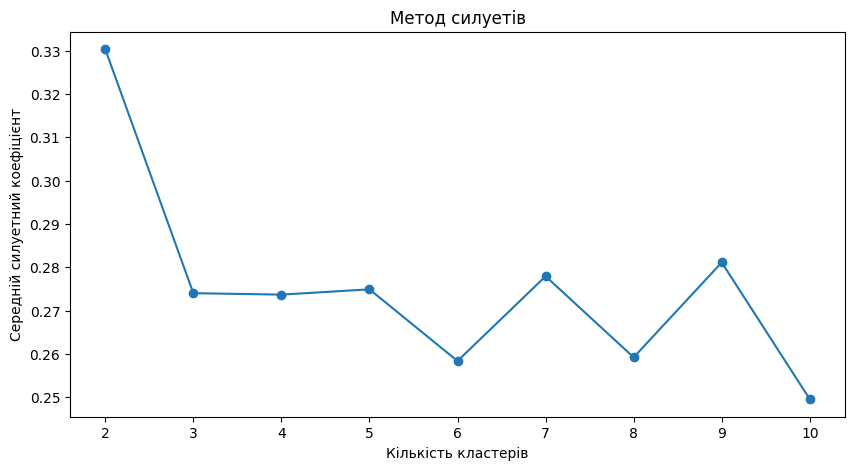

In [14]:
# Метод силуетів
silhouette_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній силуетний коефіцієнт')
plt.title('Метод силуетів')
plt.show()

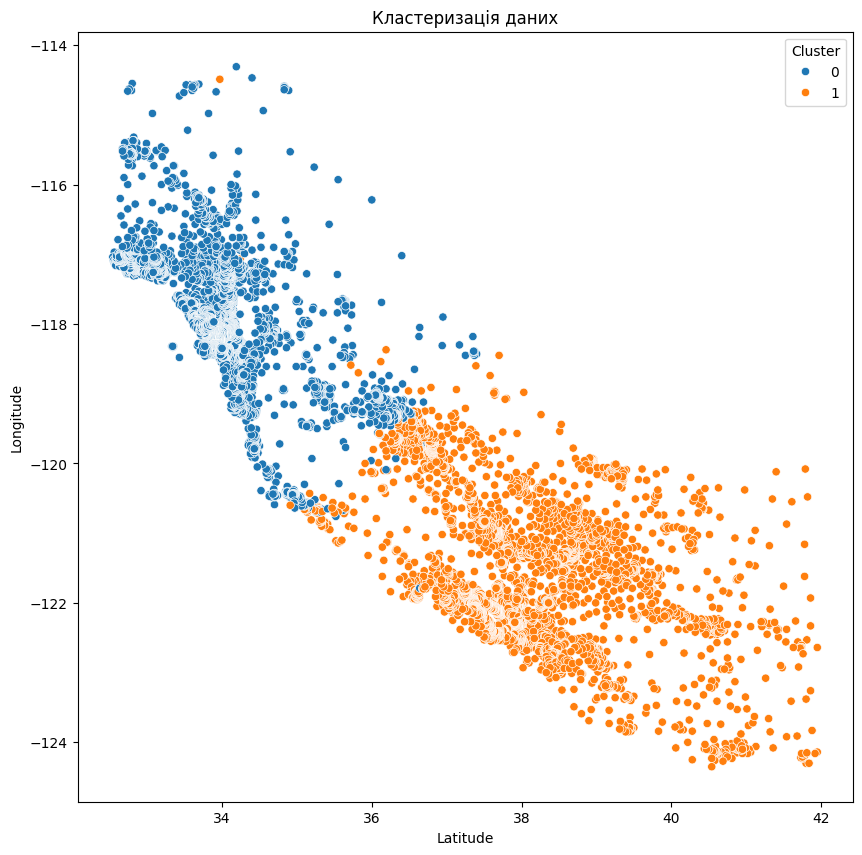

In [10]:
# Виконання кластеризації з оптимальною кількістю кластерів
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(X_scaled)
labels = kmeans.labels_

cluster_df = pd.DataFrame({
    'Cluster': labels,
    'Latitude': X['Latitude'],
    'Longitude': X['Longitude']
})

plt.figure(figsize=(10, 10))
sns.scatterplot(x='Latitude', y='Longitude', hue='Cluster', data=cluster_df, palette='tab10')
plt.title('Кластеризація даних')
plt.show()